<a href="https://colab.research.google.com/github/pvt198/03MAIR-Algoritmos-de-Optimizaci-n/blob/main/Paolo_Valerio_Testa_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2

Nombre:\ Paolo Valerio Testa

Link:\
https://colab.research.google.com/drive/1mjPiU984gLfefOkQhV-VjiXJsiFCX9Xv?usp=share_link

Github:\
https://github.com/pvt198/03MAIR-Algoritmos-de-Optimizaci-n.git


In [4]:
import math

##Programación Dinámica. Viaje por el rio


In [7]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),float("inf"),float("inf")],   #desde nodo 0
[float("inf"),0,float("inf"),2,3,float("inf"),11],  #desde nodo 1
[float("inf"),float("inf"),0,1,float("inf"),4,10], #desde nodo 2
[float("inf"),float("inf"),float("inf"), 0,5,6,9],
[float("inf"),float("inf"),float("inf"),float("inf"),0,float("inf"),4],
[float("inf"),float("inf"),float("inf"),float("inf"),float("inf"),0,3],
[float("inf"),float("inf"),float("inf"),float("inf"),float("inf"),float("inf"),0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, inf, inf],
 [inf, 0, inf, 2, 3, inf, 11],
 [inf, inf, 0, 1, inf, 4, 10],
 [inf, inf, inf, 0, 5, 6, 9],
 [inf, inf, inf, inf, 0, inf, 4],
 [inf, inf, inf, inf, inf, 0, 3],
 [inf, inf, inf, inf, inf, inf, 0]]

In [8]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [float("inf")]*N for i in [float("inf")]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]
  #print(PRECIOS)

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            #print(str((i,k,j)))
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
            #print(MIN)
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [9]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[inf, 5, 4, 3, 8, 8, 11]
[inf, inf, inf, 2, 3, 8, 7]
[inf, inf, inf, 1, 6, 4, 7]
[inf, inf, inf, inf, 5, 6, 9]
[inf, inf, inf, inf, inf, inf, 4]
[inf, inf, inf, inf, inf, inf, 3]
[inf, inf, inf, inf, inf, inf, inf]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [10]:
#Calculo de la ruta usando la matriz RUTA
global iter
iter = 0
def calcular_ruta(RUTA, desde, hasta):
  global iter
  print("recusion of calcular_ruta number: " +str(iter))
  iter=iter+1
  print("desde "+str(desde)+" hasta "+str(hasta)+" tiene que pasar por "+str(RUTA[desde][hasta]))
  print("")
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
print("")
calcular_ruta(RUTA,0,6)


La ruta es:

recusion of calcular_ruta number: 0
desde 0 hasta 6 tiene que pasar por 5

recusion of calcular_ruta number: 1
desde 0 hasta 5 tiene que pasar por 2

recusion of calcular_ruta number: 2
desde 0 hasta 2 tiene que pasar por 0



'0,2,5'

##Problema de Asignacion de tarea

In [13]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [14]:
#S(3,2) = Calculo del valor de una solucion parcial tarea 0 al agente 3, y tarea 1 al agente 2
def valor(S,COSTES):
  VALOR = 0
  #print(len(S))
  for i in range(len(S)):
    #print(i)
    #print(COSTES[S[i]][i])
    VALOR += COSTES[S[i]][i]

  output = "Valor de una solucion parcial: "
  for i in range(len(S)):
    output += "tarea " + str(i) + " al agente " + str(S[i]) + ", "
  output = output[:-2]  # Remove the last comma and space
  output += " : " + str(VALOR)
  print(output)

  return VALOR

valor((3,2),COSTES)

Valor de una solucion parcial: tarea 0 al agente 3, tarea 1 al agente 2 : 34


34

In [15]:
import itertools
#solucion por forza bruta
def fuerza_bruta (COSTES):

  mejor_valor = 10e10
  mejor_solucion = ()
  #print(list(itertools.permutations(range(len(COSTES)))))
  for s in list(itertools.permutations(range(len(COSTES)))):
    #print (s, valor(s, COSTES))
    valor_tmp = valor(s, COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s
  print("La mejor solucion es :", mejor_solucion, " con valor: ", mejor_valor)

fuerza_bruta(COSTES)

Valor de una solucion parcial: tarea 0 al agente 0, tarea 1 al agente 1, tarea 2 al agente 2, tarea 3 al agente 3 : 73
Valor de una solucion parcial: tarea 0 al agente 0, tarea 1 al agente 1, tarea 2 al agente 3, tarea 3 al agente 2 : 69
Valor de una solucion parcial: tarea 0 al agente 0, tarea 1 al agente 2, tarea 2 al agente 1, tarea 3 al agente 3 : 69
Valor de una solucion parcial: tarea 0 al agente 0, tarea 1 al agente 2, tarea 2 al agente 3, tarea 3 al agente 1 : 70
Valor de una solucion parcial: tarea 0 al agente 0, tarea 1 al agente 3, tarea 2 al agente 1, tarea 3 al agente 2 : 61
Valor de una solucion parcial: tarea 0 al agente 0, tarea 1 al agente 3, tarea 2 al agente 2, tarea 3 al agente 1 : 66
Valor de una solucion parcial: tarea 0 al agente 1, tarea 1 al agente 0, tarea 2 al agente 2, tarea 3 al agente 3 : 73
Valor de una solucion parcial: tarea 0 al agente 1, tarea 1 al agente 0, tarea 2 al agente 3, tarea 3 al agente 2 : 69
Valor de una solucion parcial: tarea 0 al agente

In [16]:
#Coste inferior para soluciones parciales
#  (1,3) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  #S=(1,3)
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
  #print(str(S)+": suma costes trabajo 1 a agente 0 mas trabajo 3 a agente 1: "+str(VALOR))

  #Estimacion coste minimo asignacion tareas
  for i in range( len(S), len(COSTES)   ):
    print("trabajo pendiente: "+str(i))
    # j agente, i tarea
    print([ "coste por agente "+str(j)+": "+str(COSTES[j][i]) for j in range(len(S), len(COSTES))  ])
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
  #print(VALOR) # suma costes trabajo 1 a agente 0 mas trabajo 3 a agente 1

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    # j agente, i tarea
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

print("Estimacion coste minimo asignacion tareas: "+str(CI((1,3),COSTES)))


trabajo pendiente: 2
['coste por agente 2: 19', 'coste por agente 3: 20']
trabajo pendiente: 3
['coste por agente 2: 23', 'coste por agente 3: 28']
Estimacion coste minimo asignacion tareas: 76


In [17]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [18]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [19]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  #print(MEJOR_SOLUCION)
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )
  print(NODOS)
  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )


ramificacion_y_poda(COSTES)

Valor de una solucion parcial: tarea 0 al agente 0, tarea 1 al agente 1, tarea 2 al agente 2, tarea 3 al agente 3 : 73
trabajo pendiente: 0
['coste por agente 0: 11', 'coste por agente 1: 14', 'coste por agente 2: 11', 'coste por agente 3: 17']
trabajo pendiente: 1
['coste por agente 0: 12', 'coste por agente 1: 15', 'coste por agente 2: 17', 'coste por agente 3: 14']
trabajo pendiente: 2
['coste por agente 0: 18', 'coste por agente 1: 13', 'coste por agente 2: 19', 'coste por agente 3: 20']
trabajo pendiente: 3
['coste por agente 0: 40', 'coste por agente 1: 22', 'coste por agente 2: 23', 'coste por agente 3: 28']
[{'s': (), 'ci': 58}]
trabajo pendiente: 1
['coste por agente 1: 15', 'coste por agente 2: 17', 'coste por agente 3: 14']
trabajo pendiente: 2
['coste por agente 1: 13', 'coste por agente 2: 19', 'coste por agente 3: 20']
trabajo pendiente: 3
['coste por agente 1: 22', 'coste por agente 2: 23', 'coste por agente 3: 28']
trabajo pendiente: 1
['coste por agente 1: 15', 'coste 

##Descenso del gradiente

In [21]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [23]:
#Definimos la funcion
#Paraboloide
f  = lambda X:  X[0]**2 + X[1]**2        #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

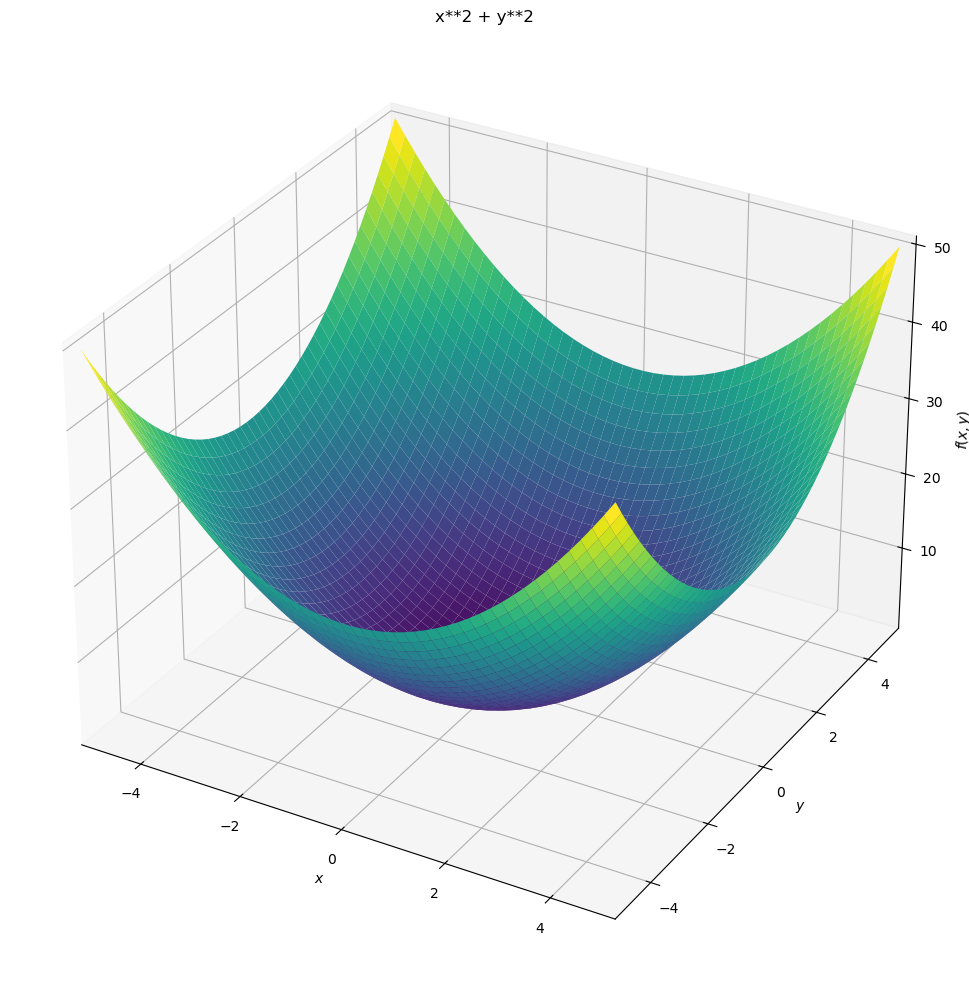

In [24]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

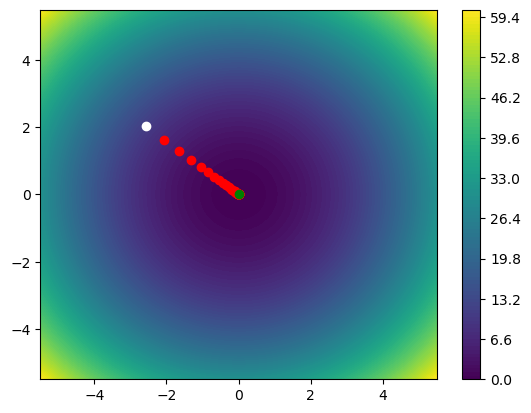

Solucion: [-3.672468979818172e-05, 2.8897850326612577e-05] 2.183788594271975e-09


In [25]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
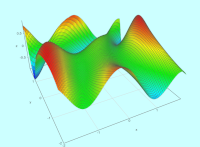


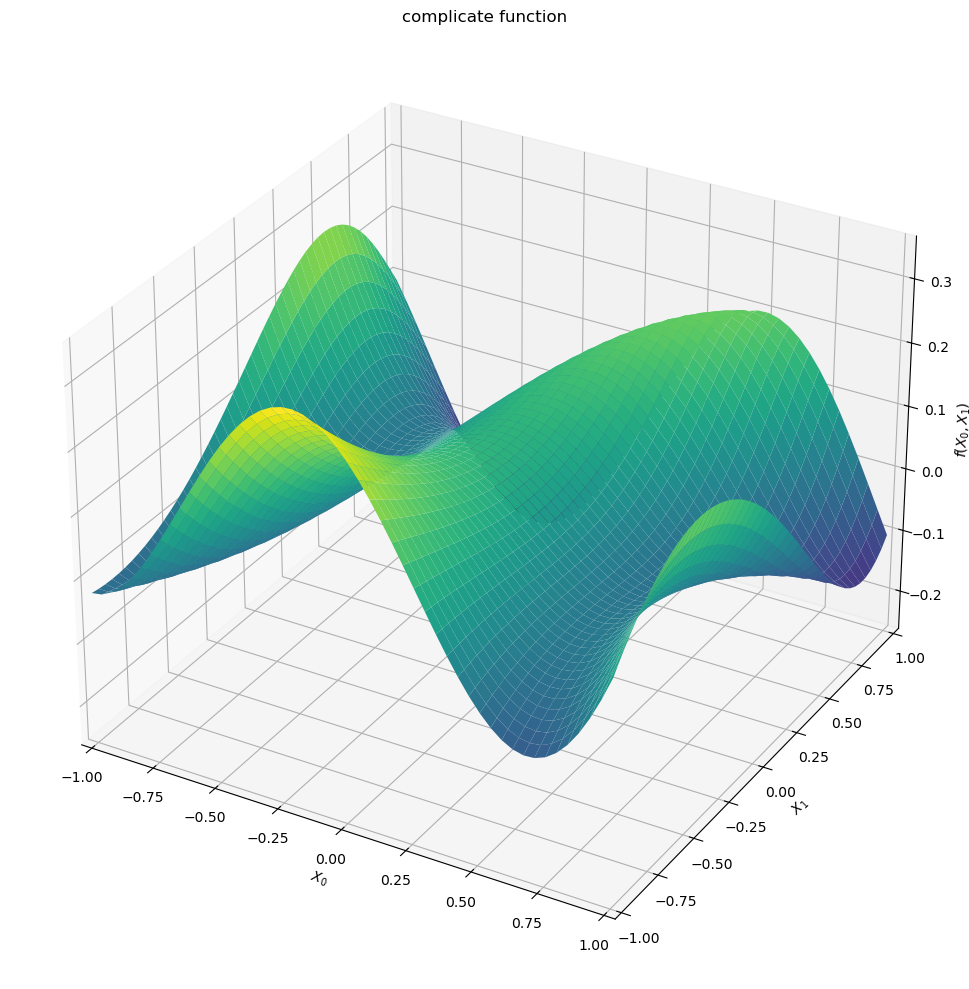

In [27]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

# Definir las variables simbólicas
import sympy as sy
X0, X1 = sy.symbols('X0 X1')

# Definir la función f
f_sy = sy.sin(1/2 * X0**2 - 1/4 * X1**2 + 3) * sy.cos(2*X0 + 1 - sy.exp(X1))

# Calcular las derivadas parciales (el gradiente)
df_dX0 = sy.diff(f_sy, X0)  # Derivada parcial de f respecto a X0
df_dX1 = sy.diff(f_sy, X1)  # Derivada parcial de f respecto a X1

# Mostrar el gradiente
gradient = [df_dX0, df_dX1]

plot3d(f_sy,
       (X0,-1,1),(X1,-1,1),
       title='complicate function',
       size=(10,10))




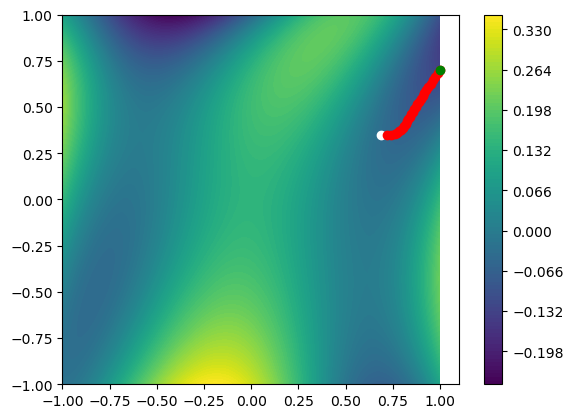

Solucion: [1.00144719578433, 0.701728325547982] -0.12954230308904438


In [28]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=1

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-rango, rango),random.uniform(-rango, rango) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=0.1

#Iteraciones:50
for _ in range(50):
  grad = [df_dX0.evalf(subs={X0: P[0], X1: P[1]}), df_dX1.evalf(subs={X0: P[0], X1: P[1]}),]
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")
  if abs(P[0])>=0.99 or abs(P[1])>=0.99:
    break

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))